https://www.kaggle.com/c/nlp-getting-started/data?select=train.csv

In [ ]:
!pip install -q kaggle
from google.colab import files
files.upload()
! mkdir ~/.kaggle 
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

!kaggle competitions download -c nlp-getting-started


In [2]:
import numpy as np
import pandas as pd
import nltk
train = pd.read_csv("/content/train.csv")
test = pd.read_csv("/content/test.csv")
train

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [3]:
X = np.array(train['text'])
y = np.array(train['target'])

In [4]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split

# EDA

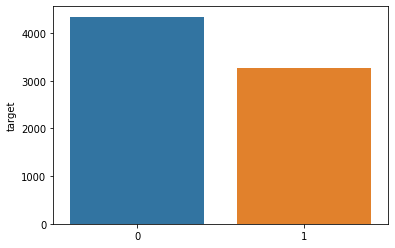

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

t = train.target.value_counts()
sns.barplot(x=t.index,y=t)
plt.show()

No. of Characters in a tweet

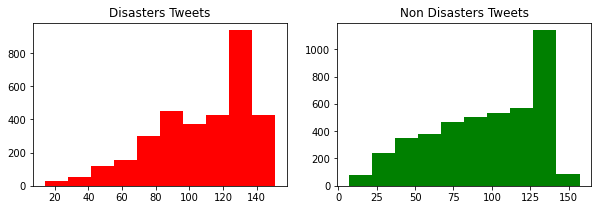

In [8]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,3))
ax1.hist(train[train['target']==1].text.str.len(),color="red")
ax1.set_title("Disasters Tweets")
ax2.hist(train[train['target']==0].text.str.len(),color="green")
ax2.set_title("Non Disasters Tweets")
plt.show()

No. of words in a tweet

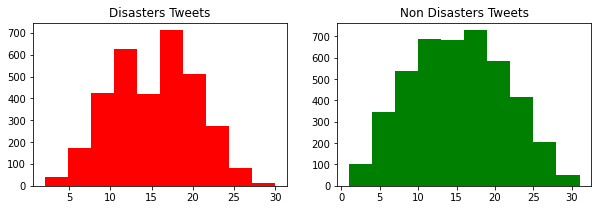

In [9]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,3))
ax1.hist(train[train['target']==1].text.str.split().map(lambda x:len(x)),color="red")
ax1.set_title("Disasters Tweets")
ax2.hist(train[train['target']==0].text.str.split().map(lambda x:len(x)),color="green")
ax2.set_title("Non Disasters Tweets")
plt.show()

Average Word length in a tweet

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


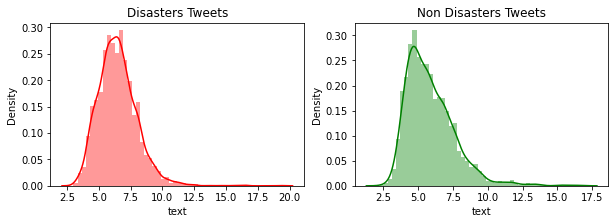

In [25]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,3))
sns.distplot(train[train['target']==1].text.str.split().map(lambda x:np.mean([len(y) for y in x ]) ),color="red",ax=ax1)
ax1.set_title("Disasters Tweets")
sns.distplot(train[train['target']==0].text.str.split().map(lambda x:np.mean([len(y) for y in x ]) ),color="green",ax=ax2)
ax2.set_title("Non Disasters Tweets")
plt.show()

# Cleaning

In [26]:
import re
df = pd.concat([train,test])
df.shape

(10876, 5)

remove links

In [29]:
example = "New competition launched :https://www.kaggle.com/c/nlp-getting-started welocme to wwwer www.google.com"
def remove_url(text):
  url = re.compile(r'https\S+|http\S+|www\.\S+')
  return url.sub(r'',text)

print(remove_url(example))

df['text'] = df['text'].apply(lambda x:remove_url(x))

New competition launched : welocme to wwwer 


remove html tags

In [30]:
example = """<div>
<h1>Real or Fake</h1>
<p>Kaggle </p>
<a href="https://www.kaggle.com/c/nlp-getting-started">getting started</a>
</div>"""

def remove_html(text):
  url = re.compile(r'<.*?>')
  return url.sub(r'',text)

print(remove_html(example))

df['text'] = df['text'].apply(lambda x:remove_html(x))


Real or Fake
Kaggle 
getting started



emojis

In [32]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

remove_emoji("Omg another Earthquake 😔😔")

df['text'] = df['text'].apply(lambda x:remove_emoji(x))

punctuations and to lower

In [33]:
example = "I am a #king with $100 dollars."
def remove_punctuations(text):
  punc = re.compile(r'[^A-Za-z0-9 ]')
  return punc.sub(r'',text).lower()

remove_punctuations(example)

df['text'] = df['text'].apply(lambda x:remove_punctuations(x))

Spelling correction

In [34]:
!pip install pyspellchecker

     |████████████████████████████████| 2.7 MB 5.4 MB/s 


In [35]:
from spellchecker import SpellChecker

def spell_correction(text):
  spell = SpellChecker()
  corrected_text = []
  misspelled = spell.unknown(text.split())
  for word in text.split():
    if word in misspelled:
      corrected_text.append(spell.correction(word))
    else:
      corrected_text.append(word)
  return ' '.join(corrected_text)

print(spell_correction("I am corect but who is th hman"))
#df['text'] = df['text'].apply(lambda x:spell_correction(x))

I am correct but who is the man


# without any cleaning

In [36]:
count_vec = CountVectorizer()
co = count_vec.fit_transform(X)
X_count = pd.DataFrame(co.A,columns=count_vec.get_feature_names())
print(X_count)

      00  000  0000  007npen6lg  ...  ûókody  ûónegligence  ûótech  ûówe
0      0    0     0           0  ...       0             0       0     0
1      0    0     0           0  ...       0             0       0     0
2      0    0     0           0  ...       0             0       0     0
3      0    1     0           0  ...       0             0       0     0
4      0    0     0           0  ...       0             0       0     0
...   ..  ...   ...         ...  ...     ...           ...     ...   ...
7608   0    0     0           0  ...       0             0       0     0
7609   0    0     0           0  ...       0             0       0     0
7610   0    0     0           0  ...       0             0       0     0
7611   0    0     0           0  ...       0             0       0     0
7612   0    0     0           0  ...       0             0       0     0

[7613 rows x 21637 columns]


In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_count,y,test_size=0.2,random_state=1)

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
model = MultinomialNB()
model.fit(X_train,y_train)
print("Training:",accuracy_score(y_train,model.predict(X_train)))
print("Testing:",accuracy_score(y_test,model.predict(X_test)))

Training: 0.9095238095238095
Testing: 0.8089297439264609


In [38]:
tfidf_vec = TfidfVectorizer()
tf = tfidf_vec.fit_transform(X)
X_tfidf = pd.DataFrame(tf.A,columns=tfidf_vec.get_feature_names())
print(X_tfidf)

       00       000  0000  007npen6lg  ...  ûókody  ûónegligence  ûótech  ûówe
0     0.0  0.000000   0.0         0.0  ...     0.0           0.0     0.0   0.0
1     0.0  0.000000   0.0         0.0  ...     0.0           0.0     0.0   0.0
2     0.0  0.000000   0.0         0.0  ...     0.0           0.0     0.0   0.0
3     0.0  0.417447   0.0         0.0  ...     0.0           0.0     0.0   0.0
4     0.0  0.000000   0.0         0.0  ...     0.0           0.0     0.0   0.0
...   ...       ...   ...         ...  ...     ...           ...     ...   ...
7608  0.0  0.000000   0.0         0.0  ...     0.0           0.0     0.0   0.0
7609  0.0  0.000000   0.0         0.0  ...     0.0           0.0     0.0   0.0
7610  0.0  0.000000   0.0         0.0  ...     0.0           0.0     0.0   0.0
7611  0.0  0.000000   0.0         0.0  ...     0.0           0.0     0.0   0.0
7612  0.0  0.000000   0.0         0.0  ...     0.0           0.0     0.0   0.0

[7613 rows x 21637 columns]


In [39]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf,y,test_size=0.2,random_state=1)

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
model = MultinomialNB()
model.fit(X_train,y_train)
print("Training:",accuracy_score(y_train,model.predict(X_train)))
print("Testing:",accuracy_score(y_test,model.predict(X_test)))

Training: 0.8891625615763546
Testing: 0.8036769533814839


There is no big difference in accuracy score for test but gap between train and test accuracy is reduced so it means overfitting is reduced

In [40]:
count_vec = CountVectorizer(max_features=10000,ngram_range=(1,2),stop_words='english',min_df=2,lowercase=True)
co = count_vec.fit_transform(X)
X_count = pd.DataFrame(co.A,columns=count_vec.get_feature_names())

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X_count,y,test_size=0.2,random_state=1)

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
model = MultinomialNB()
model.fit(X_train,y_train)
print("Training:",accuracy_score(y_train,model.predict(X_train)))
print("Testing:",accuracy_score(y_test,model.predict(X_test)))

Training: 0.8715927750410509
Testing: 0.8017071569271176


In [42]:
tfidf_vec = TfidfVectorizer(max_features=10000,ngram_range=(1,3),lowercase=True,stop_words='english',min_df=2)
tf = tfidf_vec.fit_transform(X)
X_tfidf = pd.DataFrame(tf.A,columns=tfidf_vec.get_feature_names())

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf,y,test_size=0.2,random_state=1)

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
model = MultinomialNB()
model.fit(X_train,y_train)
print("Training:",accuracy_score(y_train,model.predict(X_train)))
print("Testing:",accuracy_score(y_test,model.predict(X_test)))

Training: 0.8599343185550082
Testing: 0.7984241628365069


By changing the hyper parameters also there is no change

# Lets clean the data

In [76]:
from nltk.corpus import stopwords
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [77]:
corpus = []
porter = PorterStemmer()
for t in X:
  t = re.sub(r"[^A-Za-z]"," ",t)
  t = t.lower()
  t = t.split()
  t = [porter.stem(word) for word in t if word not in set(stopwords.words('english'))]
  t = ' '.join(t)
  corpus.append(t)
print(X[1])
print(corpus[1])

Forest fire near La Ronge Sask. Canada
forest fire near la rong sask canada


In [79]:
count_vec = CountVectorizer(max_features=10000,min_df=2,ngram_range=(1,3))
co = count_vec.fit_transform(corpus)
corpus_count = pd.DataFrame(co.A,columns=count_vec.get_feature_names())
print(corpus_count)

      aa  ab  aba  aba woman  ...  zw  zx  zy  zz
0      0   0    0          0  ...   0   0   0   0
1      0   0    0          0  ...   0   0   0   0
2      0   0    0          0  ...   0   0   0   0
3      0   0    0          0  ...   0   0   0   0
4      0   0    0          0  ...   0   0   0   0
...   ..  ..  ...        ...  ...  ..  ..  ..  ..
7608   0   0    0          0  ...   0   0   0   0
7609   0   0    0          0  ...   0   0   0   0
7610   0   0    0          0  ...   0   0   0   0
7611   0   0    0          0  ...   0   0   0   0
7612   0   0    0          0  ...   0   0   0   0

[7613 rows x 10000 columns]


In [80]:
X_train, X_test, y_train, y_test = train_test_split(corpus_count,y,test_size=0.2,random_state=1)

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
model = MultinomialNB()
model.fit(X_train,y_train)
print("Training:",accuracy_score(y_train,model.predict(X_train)))
print("Testing:",accuracy_score(y_test,model.predict(X_test)))

Training: 0.8589490968801313
Testing: 0.8056467498358503


In [81]:
tfidf_vec = TfidfVectorizer(max_features=10000,min_df=2,ngram_range=(1,3))
tf = tfidf_vec.fit_transform(corpus)
corpus_tfidf = pd.DataFrame(tf.A,columns=tfidf_vec.get_feature_names())

# LSTM

In [82]:
from tensorflow.keras.layers import Dense, Embedding, LSTM, Dropout, Bidirectional,SpatialDropout1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.optimizers import Adam
voc_size = 10000

In [83]:
onehot_rep = [one_hot(words,voc_size) for words in corpus]
print(onehot_rep[:4])

[[9554, 7883, 5769, 1677, 1726, 6402, 5544], [983, 5950, 9151, 1031, 6732, 3528, 9950], [6887, 9046, 2457, 3061, 5894, 8954, 4970, 2457, 3061, 5090, 6379], [9015, 4943, 5682, 4970, 5090, 6866]]


In [84]:
embedded_docs = pad_sequences(onehot_rep,padding='post')
sent_length = embedded_docs.shape[1]
print(embedded_docs.shape)
print(embedded_docs)

(7613, 27)
[[9554 7883 5769 ...    0    0    0]
 [ 983 5950 9151 ...    0    0    0]
 [6887 9046 2457 ...    0    0    0]
 ...
 [8108 4580 4817 ...    0    0    0]
 [6949  403 5543 ...    0    0    0]
 [6072 2078 3554 ...    0    0    0]]


In [85]:
embedding_vector_features = 100

model = Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length,trainable=False))
model.add(SpatialDropout1D(0.2))
model.add(Bidirectional(LSTM(100,dropout=0.2,recurrent_dropout=0.2)))
#model.add(SpatialDropout1D(0.5))
model.add(Dense(1,activation='sigmoid'))

optimizer = Adam(learning_rate=1e-5)
model.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [101]:
X_embed = np.array(embedded_docs)
X_train, X_test, y_train, y_test = train_test_split(X_embed,train['target'].values,test_size=0.2)

model.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=64,epochs=2)
print("Training data:",accuracy_score(y_train,model.predict(X_train).astype('int')))
print("Test data:",accuracy_score(y_test,model.predict(X_test).astype('int')))

Epoch 1/2
96/96 [==============================] - 27s 286ms/step - loss: 0.6761 - accuracy: 0.5652 - val_loss: 0.6672 - val_accuracy: 0.5909
Epoch 2/2
96/96 [==============================] - 27s 285ms/step - loss: 0.6747 - accuracy: 0.5652 - val_loss: 0.6657 - val_accuracy: 0.5909
Training data: 0.5651888341543514
Test data: 0.5909389363099147


# Transformers

In [ ]:
!pip install transformers

In [103]:
from transformers import BertTokenizer, TFBertModel
import tensorflow as tf

model_name = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = BertTokenizer.from_pretrained(model_name)

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'DistilBertTokenizer'. 
The class this function is called from is 'BertTokenizer'.


In [104]:
def encoded_sentence(s):
  tokens = list(tokenizer.tokenize(s))
  tokens.append('[SEP]')
  tokens.insert(0,'[CLS]')
  return list(tokenizer.convert_tokens_to_ids(tokens))
encoded_sentence("I am good boy")

[101, 1045, 2572, 2204, 2879, 102]

In [105]:
max_len = 84
from tensorflow.keras.preprocessing.sequence import pad_sequences

def bert_encode(text,tokenizer):

  num_examples = len(text)

  input_word_ids = tf.concat([tf.ragged.constant( pad_sequences([encoded_sentence(s) for s in np.array(text)],maxlen=max_len))],axis=-1)

  input_mask = tf.ones_like(input_word_ids).to_tensor()

  input_type_ids = tf.ones_like(input_word_ids).to_tensor()

  inputs = {
      'input_word_ids':input_word_ids.to_tensor(),
      'input_mask':input_mask,
      'input_type_ids':input_type_ids
  }

  return inputs

In [106]:
train_inputs = bert_encode(train.text.values,tokenizer)

In [107]:
def build_model():
  bert_encoded = TFBertModel.from_pretrained(model_name)
  input_word_ids = tf.keras.Input(shape=(max_len,),dtype=tf.int32,name='input_word_ids')
  input_mask = tf.keras.Input(shape=(max_len,),dtype=tf.int32,name='input_mask')
  input_type_ids = tf.keras.Input(shape=(max_len,),dtype=tf.int32,name='input_type_ids')

  embedding = bert_encoded([input_word_ids,input_mask,input_type_ids])[0]
  
  model_X = tf.keras.layers.Dense(100,activation='relu')(embedding[:,0,:])

  model_X = tf.keras.layers.BatchNormalization()(model_X)

  model_X = tf.keras.layers.Dropout(0.3)(model_X)

  model_X = tf.keras.layers.Dense(100,activation='relu')(model_X)

  model_X = tf.keras.layers.BatchNormalization()(model_X)

  model_X = tf.keras.layers.Dropout(0.3)(model_X)
  
  output = tf.keras.layers.Dense(1,activation='sigmoid')(model_X)

  model = tf.keras.Model(inputs=[input_word_ids,input_mask,input_type_ids],outputs=output)

  return model

In [108]:
model = build_model()
model.layers[3].trainable = False
model.summary()

You are using a model of type distilbert to instantiate a model of type bert. This is not supported for all configurations of models and can yield errors.


Downloading:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some layers from the model checkpoint at distilbert-base-uncased-finetuned-sst-2-english were not used when initializing TFBertModel: ['distilbert', 'classifier', 'dropout_19', 'pre_classifier']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFBertModel were not initialized from the model checkpoint at distilbert-base-uncased-finetuned-sst-2-english and are newly initialized: ['bert']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experi

In [109]:
model.compile(tf.keras.optimizers.Adam(lr=1e-5), loss='binary_crossentropy', metrics=['accuracy'])
model.fit(train_inputs, train.target.values, epochs = 5, verbose = 1, batch_size = 64,validation_split=0.2)

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


96/96 [==============================] - 104s 925ms/step - loss: 1.0120 - accuracy: 0.4831 - val_loss: 0.7225 - val_accuracy: 0.5345
Epoch 2/5
96/96 [==============================] - 85s 887ms/step - loss: 0.9945 - accuracy: 0.4908 - val_loss: 0.7580 - val_accuracy: 0.5345
Epoch 3/5
96/96 [==============================] - 85s 887ms/step - loss: 0.9686 - accuracy: 0.5003 - val_loss: 0.7764 - val_accuracy: 0.5345
Epoch 4/5
96/96 [==============================] - 85s 887ms/step - loss: 0.9591 - accuracy: 0.5046 - val_loss: 0.7723 - val_accuracy: 0.5345
Epoch 5/5
96/96 [==============================] - 85s 885ms/step - loss: 0.9235 - accuracy: 0.5062 - val_loss: 0.7672 - val_accuracy: 0.5345


In [ ]:
test_inputs = bert_encode(test.text.values,tokenizer)
y_pred = model.predict(test_inputs)
y_pred

array([[0.3403283 ],
       [0.350404  ],
       [0.3882941 ],
       ...,
       [0.37758085],
       [0.38659048],
       [0.37740543]], dtype=float32)

In [ ]:
ans = pd.DataFrame({'id':np.array(test['id']),'target':np.array(y_pred.round().astype(int)).reshape(-1)})
ans.to_csv('submission.csv',index=False)
ans

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0
...,...,...
3258,10861,0
3259,10865,0
3260,10868,0
3261,10874,0


# Transformers

In [ ]:
!pip install transformers

     |████████████████████████████████| 2.5 MB 9.6 MB/s 
     |████████████████████████████████| 3.3 MB 68.7 MB/s 
     |████████████████████████████████| 895 kB 53.5 MB/s 


In [110]:
from transformers import AutoTokenizer
distil_bert = 'bert-base-cased'
tokenizer = AutoTokenizer.from_pretrained(distil_bert)

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/213k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/436k [00:00<?, ?B/s]

In [111]:
from transformers import TFAutoModel
import tensorflow as tf

transformer_model = TFAutoModel.from_pretrained(distil_bert)

Downloading:   0%|          | 0.00/527M [00:00<?, ?B/s]

Some layers from the model checkpoint at bert-base-cased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [112]:
from tqdm import tqdm
def tokenize( sentence,tokenizer):

  tokens = tokenizer.encode_plus(sentence, max_length=128,
                                   truncation=True, padding='max_length',
                                   add_special_tokens=True, return_attention_mask=True,
                                   return_token_type_ids=False, return_tensors='tf')

  return tokens['input_ids'], tokens['attention_mask']

X_ids = np.zeros((len(X),128))
X_mask = np.zeros((len(X),128))

for i, sentence in enumerate(X):
  X_ids[i,:], X_mask[i,:] = tokenize(sentence,tokenizer)

dataset = tf.data.Dataset.from_tensor_slices((X_ids,X_mask,y))

def map_fun(input_ids,mask,labels):
  return {'input_tokens':input_ids,'masket_tokens':mask}, labels  

dataset = dataset.map(map_fun)

dataset = dataset.shuffle(10000).batch(32)


DS_LEN = len(list(dataset))  # get dataset length

SPLIT = 0.9  # we will create a 90-10 split

# create training-validation sets
train = dataset.take(round(DS_LEN*SPLIT))
val = dataset.skip(round(DS_LEN*SPLIT))


In [ ]:
model.layers[2]

In [113]:
input_ids = tf.keras.layers.Input(shape=(128,),name='input_tokens',dtype='int32')
input_mask_ids = tf.keras.layers.Input(shape=(128,),name='masket_tokens',dtype='int32')

model_X = transformer_model(input_ids,input_mask_ids)[0]
model_X = tf.keras.layers.Dense(100,activation='relu')(model_X)
model_X = tf.keras.layers.Dropout(0.2)(model_X)

model_X = tf.keras.layers.Dense(1,activation='sigmoid')(model_X)

model = tf.keras.Model(inputs=[input_ids,input_mask_ids],outputs=model_X)

model.layers[2].trainable = False

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
# train_ids, train_mask_ids = tokenize(X_train,tokenizer)
# test_ids, test_mask_ids = tokenize(X_test,tokenizer)

100%|██████████| 1523/1523 [00:00<00:00, 6131.12it/s]


In [ ]:
model.summary()

Model: "model_13"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_tokens (InputLayer)       [(None, 128)]        0                                            
__________________________________________________________________________________________________
masket_tokens (InputLayer)      [(None, 128)]        0                                            
__________________________________________________________________________________________________
tf_bert_model (TFBertModel)     TFBaseModelOutputWit 108310272   input_tokens[0][0]               
                                                                 masket_tokens[0][0]              
__________________________________________________________________________________________________
dense_25 (Dense)                (None, 128, 100)     76900       tf_bert_model[9][0]       

In [114]:
optimizer = tf.keras.optimizers.Adam(0.01)
losses = tf.keras.losses.BinaryCrossentropy()
accuracy = tf.keras.metrics.BinaryAccuracy('accuracy')
model.compile(optimizer=optimizer,loss=losses,metrics=[accuracy])
model.fit(train,validation_data=val,epochs=4)

Epoch 1/4
214/214 [==============================] - 154s 648ms/step - loss: 0.5373 - accuracy: 0.7364 - val_loss: 0.5133 - val_accuracy: 0.7668
Epoch 2/4
214/214 [==============================] - 135s 632ms/step - loss: 0.5132 - accuracy: 0.7530 - val_loss: 0.5310 - val_accuracy: 0.7411
Epoch 3/4
214/214 [==============================] - 135s 632ms/step - loss: 0.5084 - accuracy: 0.7573 - val_loss: 0.4526 - val_accuracy: 0.7954
Epoch 4/4
214/214 [==============================] - 135s 632ms/step - loss: 0.4935 - accuracy: 0.7666 - val_loss: 0.4836 - val_accuracy: 0.7671


In [ ]:
comp = test['text'].values
comp

array(['Just happened a terrible car crash',
       'Heard about #earthquake is different cities, stay safe everyone.',
       'there is a forest fire at spot pond, geese are fleeing across the street, I cannot save them all',
       ..., 'Green Line derailment in Chicago http://t.co/UtbXLcBIuY',
       'MEG issues Hazardous Weather Outlook (HWO) http://t.co/3X6RBQJHn3',
       '#CityofCalgary has activated its Municipal Emergency Plan. #yycstorm'],
      dtype=object)

In [ ]:

comp_ids = np.zeros((len(comp),128))
comp_mask = np.zeros((len(comp),128))

for i, sentence in enumerate(comp):
  comp_ids[i,:], comp_mask[i,:] = tokenize(sentence,tokenizer)

comp_dataset = tf.data.Dataset.from_tensor_slices((comp_ids,comp_mask))

def comp_map_fun(input_ids,mask):
  return {'input_tokens':input_ids,'masket_tokens':mask} 

comp_dataset = comp_dataset.map(comp_map_fun)


In [ ]:
sub = model.predict(comp_dataset)
sub.shape

(417664, 1, 1)

In [ ]:
tokenizer.decode(sub)

In [ ]:
train

<TakeDataset shapes: ({input_tokens: (None, 128), masket_tokens: (None, 128)}, (None,)), types: ({input_tokens: tf.float64, masket_tokens: tf.float64}, tf.int64)>

# Bert using TFHub

In [ ]:
!wget --quiet https://raw.githubusercontent.com/tensorflow/models/master/official/nlp/bert/tokenization.py
!pip install sentencepiece

In [ ]:
import tensorflow_hub as hub
import tokenization
import tensorflow as tf

In [ ]:
def bert_encode(texts,tokenizer, max_len = 512):
  all_tokens = []
  all_masks = []
  all_segments = []

  for text in texts:
    text = tokenizer.tokenize(text)

    text = text[:max_len-2]
    input_sequence = ["[CLS]"] + text + ["[SEP]"]

    tokens = tokenizer.convert_tokens_to_ids(text)
    pad_len = max_len - len(input_sequence)

    tokens += [0]*pad_len
    pad_mask = [1]*len(input_sequence)+[0]*pad_len

    segment_id = [0]*max_len

    all_tokens.append(tokens)
    all_masks.append(pad_mask)
    all_segments.append(segment_id)

  return np.array(all_tokens), np.array(all_masks), np.array(all_segments)

In [ ]:
def build_model(bert_layer,max_len=512):

  input_word_ids = tf.keras.layers.Input(shape=(max_len,),dtype=tf.int32,name="input_word_ids")
  input_mask = tf.keras.layers.Input(shape=(max_len,),dtype=tf.int32,name="input_mask")
  input_segment_ids = tf.keras.layers.Input(shape=(max_len,),dtype=tf.int32,name="input_segment_ids")

  _,sequence_output = bert_layer([input_word_ids,input_mask,input_segment_ids])
  clf_output = sequence_output[:,0,:]
  model_X = tf.keras.layers.Dense(100,activation='relu')(clf_output)
  model_X = tf.keras.layers.BatchNormalization()(model_X)
  model_X = tf.keras.layers.Dropout(0.3)(model_X)
  model_X = tf.keras.layers.Dense(100,activation='relu')(model_X)
  model_X = tf.keras.layers.BatchNormalization()(model_X)
  model_X = tf.keras.layers.Dropout(0.3)(model_X)
  out = tf.keras.layers.Dense(1,activation='sigmoid')(model_X)

  model = tf.keras.models.Model(inputs=[input_word_ids,input_mask,input_segment_ids],outputs=out)

  return model

In [ ]:
%%time
module_url = "https://tfhub.dev/tensorflow/bert_en_uncased_L-24_H-1024_A-16/1"
bert_layer = hub.KerasLayer(module_url, trainable=False)

CPU times: user 13.8 s, sys: 2.48 s, total: 16.3 s
Wall time: 20.1 s


In [ ]:
vocab_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()
do_lower_case = bert_layer.resolved_object.do_lower_case.numpy()
tokenizer = tokenization.FullTokenizer(vocab_file, do_lower_case)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
train_input = bert_encode(X_train,tokenizer,max_len=160)
val_input = bert_encode(X_test,tokenizer,max_len=160)
test_input = bert_encode(test.text.values,tokenizer,max_len=160)
train_labels = y_train
val_labels = y_test

In [ ]:
model = build_model(bert_layer,max_len=160)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_word_ids (InputLayer)     [(None, 160)]        0                                            
__________________________________________________________________________________________________
input_mask (InputLayer)         [(None, 160)]        0                                            
__________________________________________________________________________________________________
input_segment_ids (InputLayer)  [(None, 160)]        0                                            
__________________________________________________________________________________________________
keras_layer (KerasLayer)        [(None, 1024), (None 335141889   input_word_ids[0][0]             
                                                                 input_mask[0][0]             

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam
checkpoint = ModelCheckpoint('model.h5', monitor='val_loss', save_best_only=True)
es = EarlyStopping(monitor='val_loss',patience=3,verbose=1,restore_best_weights=True)

model.compile(optimizer=Adam(lr=1e-5),loss='binary_crossentropy',metrics=['accuracy'])
train_history = model.fit(
    train_input, train_labels,
    validation_data=(val_input,val_labels),
    epochs=3,
    callbacks=[checkpoint,es],
    batch_size=12
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/3
508/508 [==============================] - 280s 539ms/step - loss: 0.6887 - accuracy: 0.6560 - val_loss: 0.5637 - val_accuracy: 0.7255
Epoch 2/3
508/508 [==============================] - 272s 535ms/step - loss: 0.6640 - accuracy: 0.6663 - val_loss: 0.5520 - val_accuracy: 0.7328
Epoch 3/3
508/508 [==============================] - 271s 535ms/step - loss: 0.6451 - accuracy: 0.6839 - val_loss: 0.5392 - val_accuracy: 0.7387


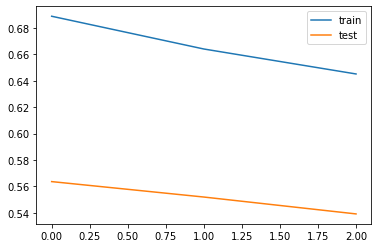

In [ ]:
import matplotlib.pyplot as plt
plt.plot(train_history.history['loss'], label='train')
plt.plot(train_history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [ ]:
y_pred = model.predict(test_input)

In [ ]:
ans = pd.DataFrame({'id':np.array(test['id']),'target':np.array(y_pred.round().astype(int)).reshape(-1)})
ans.to_csv('submission.csv',index=False)
ans

,id,target
0,0,0
1,2,1
2,3,0
3,9,1
4,11,1
...,...,...
3258,10861,0
3259,10865,1
3260,10868,1
3261,10874,1


# Word2vec

In [51]:
import nltk
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
import tqdm
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [52]:
corpus = []
porter = PorterStemmer()

for text in df['text']:
  text = re.sub(r'[^A-Za-z]',' ',text)
  text = text.lower()
  text = text.split()
  text = [porter.stem(t) for t in text if t not in stopwords.words('english')]
  text = ' '.join(text)
  corpus.append(text)
print(corpus[0:4])

['deed reason earthquak may allah forgiv us', 'forest fire near la rong sask canada', 'resid ask shelter place notifi offic evacu shelter place order expect', 'peopl receiv wildfir evacu order california']


In [53]:
from gensim.models import Word2Vec
corpus_vec = [nltk.word_tokenize(word) for word in corpus]
print(corpus_vec[:2])

[['deed', 'reason', 'earthquak', 'may', 'allah', 'forgiv', 'us'], ['forest', 'fire', 'near', 'la', 'rong', 'sask', 'canada']]


In [54]:
model_vec = Word2Vec(corpus_vec,min_count=1)

In [55]:
documents = []

for document in corpus_vec:
  word_vectors = []
  for word in document:
    word_vectors.append(model_vec.wv[word])
  documents.append((word_vectors))
documents_matrix = documents


In [56]:
documents_matrix[8][0].shape

(100,)

In [57]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

docs = ['Well done!',
		'Good work',
		'Great effort',
		'nice work',
		'Excellent!',
		'Weak',
		'Poor effort!',
		'not good',
		'poor work',
		'Could have done better.']
# define class labels
labels = np.array([1,1,1,1,1,0,0,0,0,0])
# prepare tokenizer
t = Tokenizer()
t.fit_on_texts(docs)
vocab_size = len(t.word_index)+1

encoded_docs = t.texts_to_sequences(docs)
max_length = 80
padded_docs = pad_sequences(encoded_docs,maxlen=max_length,padding='post')

In [49]:
X_train, X_test, y_train, y_test = train_test_split(corpus_tfidf,y,test_size=0.2,random_state=1)

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
model = MultinomialNB()
model.fit(X_train,y_train)
print("Training:",accuracy_score(y_train,model.predict(X_train)))
print("Testing:",accuracy_score(y_test,model.predict(X_test)))

Training: 0.857799671592775
Testing: 0.8010505581089954


In [50]:
X_train, X_test, y_train, y_test = train_test_split(corpus_tfidf,y,test_size=0.2,random_state=1)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()
model.fit(X_train,y_train)
print("Training:",accuracy_score(y_train,model.predict(X_train)))
print("Testing:",accuracy_score(y_test,model.predict(X_test)))

Training: 0.8814449917898194
Testing: 0.7971109652002626


# Test data

In [ ]:
test_X = np.array(test['text'])
test_corpus = []
porter = PorterStemmer()
for t in test_X:
  t = re.sub(r"[^A-Za-z]"," ",t)
  t = t.lower()
  t = t.split()
  t = [porter.stem(word) for word in t if word not in set(stopwords.words('english'))]
  t = ' '.join(t)
  test_corpus.append(t)

In [ ]:
test_onehot_rep = [one_hot(words,voc_size) for words in test_corpus]
test_embedded_docs = pad_sequences(test_onehot_rep,padding='pre',maxlen=sent_length)
print(test_embedded_docs.shape)

In [ ]:
#test_tfidf = tfidf_vec.transform(test_corpus)
#sub = model.predict_classes(test_embedded_docs)
ans = pd.DataFrame({'id':np.array(test['id']),'target':np.array(sub).reshape(-1)})
ans.to_csv('submission.csv',index=False)
ans